# 什么是目标检测

![任务描述](https://github.com/open-mmlab/mmyolo/assets/17425982/596d8061-0469-45fb-9739-4c0c8f2e0fef)


目标检测任务即：给定图片，网络预测出所关注的所有物体边界框和类别。其是一个典型的多任务学习，既包括物体边界框学习还包括类别学习。

# 什么是 MMDetection

![任务描述](https://github.com/open-mmlab/mmyolo/assets/17425982/c964f7a7-66f8-44fd-bc92-83d4fbed8e79)

MMDetection 是被广泛使用的检测工具箱，包括了目标检测、实例分割、全景分割等多个通用检测方向，并支持了 75+ 个主流和前沿模型，为用户提供超过 440+ 个预训练模型，在学术研究和工业落地中拥有广泛应用。该框架的主要特点为：

- **模块化设计**

  MMDetection 将检测框架解耦成不同的模块组件，通过组合不同的模块组件，用户可以便捷地构建自定义的检测模型

- **支持多种检测任务**

  MMDetection 支持了各种不同的检测任务，包括**目标检测**，**实例分割**，**全景分割**，以及**半监督目标检测**。后续会重点支持多模态通用检测方向

- **速度快**

  基本的框和 mask 操作都实现了 GPU 版本，训练速度比其他代码库更快或者相当。

- **性能高**

  MMDetection 这个算法库源自于 COCO 2018 目标检测竞赛的冠军团队 *MMDet* 团队开发的代码，我们在之后持续进行了改进和提升。
  新发布的 [RTMDet](configs/rtmdet) 还在实时实例分割和旋转目标检测任务中取得了最先进的成果，同时也在目标检测模型中取得了最佳的的参数量和精度平衡。
 
**近期我们发布了 MMDetection 3.0 正式版本。在 MMDetection V2.0 基础上，通过更细粒度的模块解耦，我们进一步拆解出了数据、数据变换、模型、评测、可视化器等抽象，并将这些接口进行了统一设计，统一的数据流和细粒度的模块大幅提升了任务拓展性能。我们基于全新训练引擎 MMEngine 和计算机视觉的基础库 MMCV 进行了全面适配，经过对模型各个组件的重构和优化，全面提升了 MMDetection 的速度和精度，达到了现有检测框架中的最优水平。**

 
MMDetection Repo：https://github.com/open-mmlab/mmdetection/

MMDetection 官方文档链接：https://mmdetection.readthedocs.io/en/latest/


下面我们将以 MMDetection 团队自研的 RTMDet 算法为例，结合一个简单的 cat 数据集来描述整个训练推理可视化过程。

本教程一共包括如下流程：

1. 数据集准备和可视化
2. 自定义配置文件
3. 训练前可视化验证
4. 模型训练
5. 模型测试和推理
6. 可视化分析

**注意事项：为了方便大家复现，本教程配套的 Notebook 将位于 https://github.com/open-mmlab/mmdetection/tree/tutorials 处。**

在开始前，需要先检测环境并安装 MMDetection 及其依赖

# 0 环境检测和安装

<div align="center">
  <img src="https://github.com/open-mmlab/mmdetection/raw/3.x/resources/mmdet-logo.png" width="600"/>
  <div>&nbsp;</div>
  <div align="center">
    <b><font size="5">OpenMMLab website</font></b>
    <sup>
      <a href="https://openmmlab.com">
        <i><font size="4">HOT</font></i>
      </a>
    </sup>
    &nbsp;&nbsp;&nbsp;&nbsp;
    <b><font size="5">OpenMMLab platform</font></b>
    <sup>
      <a href="https://platform.openmmlab.com">
        <i><font size="4">TRY IT OUT</font></i>
      </a>
    </sup>
  </div>
  <div>&nbsp;</div>
    
<a href="https://colab.research.google.com/github/open-mmlab/mmdetection/blob/main/tutorials/rtmdet_cat_tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>  

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# 安装 mmengine 和 mmcv 依赖
# 为了防止后续版本变更导致的代码无法运行，我们暂时锁死版本
!pwd
%pip install -U "openmim==0.3.7"
!mim install "mmengine==0.7.1"
!mim install "mmcv==2.0.0"

# Install mmdetection
!rm -rf mmdetection
# 为了防止后续更新导致的可能无法运行，特意新建了 tutorials 分支
!git clone -b tutorials https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

%pip install -e .

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.9/366.9 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 25.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 10.5 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 36093, done.
remote: Counting objects: 100% (747/747), done.
remote: Compressing objects: 100% (379/379), done.
remote: Total 36093 (delta

In [ ]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet

# 环境信息收集和打印
def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
CUDA available: True
numpy_random_seed: 2147483648
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.8, V11.8.89
GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
PyTorch: 2.0.0+cu118
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-

# 1 数据集准备和可视化

我们提供了一个简单的 cat 猫数据集，该数据集来自社区用户，总共包括 144 张图片，并且已经提前划分为了训练集和测试集。

In [ ]:
# 数据集下载
!rm -rf cat_dataset*
!wget https://download.openmmlab.com/mmyolo/data/cat_dataset.zip
!unzip cat_dataset.zip -d cat_dataset && rm cat_dataset.zip 

--2023-05-17 11:46:41--  https://download.openmmlab.com/mmyolo/data/cat_dataset.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.82.215, 163.181.82.217, 163.181.82.213, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.82.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227204484 (217M) [application/zip]
Saving to: ‘cat_dataset.zip’

cat_dataset.zip     100%[===================>] 216.68M   143MB/s    in 1.5s    

2023-05-17 11:46:43 (143 MB/s) - ‘cat_dataset.zip’ saved [227204484/227204484]

Archive:  cat_dataset.zip
   creating: cat_dataset/annotations/
  inflating: cat_dataset/annotations/annotations_all.json  
  inflating: cat_dataset/annotations/test.json  
  inflating: cat_dataset/annotations/trainval.json  
  inflating: cat_dataset/class_with_id.txt  
   creating: cat_dataset/images/
  inflating: cat_dataset/images/IMG_20210627_225110.jpg  
  inflating: cat_dataset/images/IMG_20210705_084125__01.jpg  
  

In [ ]:
# 数据集可视化

import os
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))

image_paths= [filename for filename in os.listdir('cat_dataset/images')][:8]

for i,filename in enumerate(image_paths):
    name = os.path.splitext(filename)[0]

    image = Image.open('cat_dataset/images/'+filename).convert("RGB")
  
    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

此单元格的输出内容太大，只能在登录的情况下显示。


我们也提供了 coco json 标注，用户可以直接使用，而无需自己重新标注。COCO Json 可视化如下所示

In [ ]:
from pycocotools.coco import COCO
import numpy as np
import os.path as osp
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

def apply_exif_orientation(image):
    _EXIF_ORIENT = 274
    if not hasattr(image, 'getexif'):
        return image

    try:
        exif = image.getexif()
    except Exception:
        exif = None

    if exif is None:
        return image

    orientation = exif.get(_EXIF_ORIENT)

    method = {
        2: Image.FLIP_LEFT_RIGHT,
        3: Image.ROTATE_180,
        4: Image.FLIP_TOP_BOTTOM,
        5: Image.TRANSPOSE,
        6: Image.ROTATE_270,
        7: Image.TRANSVERSE,
        8: Image.ROTATE_90,
    }.get(orientation)
    if method is not None:
        return image.transpose(method)
    return image


def show_bbox_only(coco, anns, show_label_bbox=True, is_filling=True):
    """Show bounding box of annotations Only."""
    if len(anns) == 0:
        return

    ax = plt.gca()
    ax.set_autoscale_on(False)

    image2color = dict()
    for cat in coco.getCatIds():
        image2color[cat] = (np.random.random((1, 3)) * 0.7 + 0.3).tolist()[0]

    polygons = []
    colors = []

    for ann in anns:
        color = image2color[ann['category_id']]
        bbox_x, bbox_y, bbox_w, bbox_h = ann['bbox']
        poly = [[bbox_x, bbox_y], [bbox_x, bbox_y + bbox_h],
                [bbox_x + bbox_w, bbox_y + bbox_h], [bbox_x + bbox_w, bbox_y]]
        polygons.append(Polygon(np.array(poly).reshape((4, 2))))
        colors.append(color)

        if show_label_bbox:
            label_bbox = dict(facecolor=color)
        else:
            label_bbox = None

        ax.text(
            bbox_x,
            bbox_y,
            '%s' % (coco.loadCats(ann['category_id'])[0]['name']),
            color='white',
            bbox=label_bbox)

    if is_filling:
        p = PatchCollection(
            polygons, facecolor=colors, linewidths=0, alpha=0.4)
        ax.add_collection(p)
    p = PatchCollection(
        polygons, facecolor='none', edgecolors=colors, linewidths=2)
    ax.add_collection(p)

    
coco = COCO('cat_dataset/annotations/test.json')
image_ids = coco.getImgIds()
np.random.shuffle(image_ids)

plt.figure(figsize=(16, 5))

# 只可视化 8 张图片
for i in range(8):
    image_data = coco.loadImgs(image_ids[i])[0]
    image_path = osp.join('cat_dataset/images/',image_data['file_name'])
    annotation_ids = coco.getAnnIds(
            imgIds=image_data['id'], catIds=[], iscrowd=0)
    annotations = coco.loadAnns(annotation_ids)
    
    ax = plt.subplot(2, 4, i+1)
    image = Image.open(image_path).convert("RGB")
    
    # 这行代码很关键，否则可能图片和标签对不上
    image=apply_exif_orientation(image)
    
    ax.imshow(image)
    
    show_bbox_only(coco, annotations)
    
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])
        
plt.tight_layout()    

此单元格的输出内容太大，只能在登录的情况下显示。


# 2 自定义配置文件

本教程采用 RTMDet 进行演示，在开始自定义配置文件前，先来了解下 RTMDet 算法。

![RTMDet](https://user-images.githubusercontent.com/27466624/225922103-404064c1-3cb0-4ab5-9388-79f9517dcdb0.jpg)

其模型架构图如上所示。RTMDet 是一个高性能低延时的检测算法，目前已经实现了目标检测、实例分割和旋转框检测任务。其简要描述为：**为了获得更高效的模型架构，MMDetection 探索了一种具有骨干和 Neck 兼容容量的架构，由一个基本的构建块构成，其中包含大核深度卷积。MMDetection 进一步在动态标签分配中计算匹配成本时引入软标签，以提高准确性。结合更好的训练技巧，得到的目标检测器名为 RTMDet，在 NVIDIA 3090 GPU 上以超过 300 FPS 的速度实现了 52.8% 的 COCO AP，优于当前主流的工业检测器。RTMDet 在小/中/大/特大型模型尺寸中实现了最佳的参数-准确度权衡，适用于各种应用场景，并在实时实例分割和旋转对象检测方面取得了新的最先进性能。**

|                            | mAP             | Params         | Flops        | Inference speed |
| -------------------------- | --------------- | -------------- | ------------ | --------------- |
| Baseline(YOLOX)            | 40.2            | 9M             | 13.4G        | 1.2ms           |
| + AdamW + Flat Cosine      | 40.6 (+0.4)     | 9M             | 13.4G        | 1.2ms           |
| + CSPNeXt backbone & PAFPN | 41.8 (+1.2)     | 10.07M (+1.07) | 14.8G (+1.4) | 1.22ms (+0.02)  |
| + SepBNHead                | 41.8 (+0)       | 8.89M (-1.18)  | 14.8G        | 1.22ms          |
| + Label Assign & Loss      | 42.9 (+1.1)     | 8.89M          | 14.8G        | 1.22ms          |
| + Cached Mosaic & MixUp    | 44.2 (+1.3)     | 8.89M          | 14.8G        | 1.22ms          |
| + RSB-pretrained backbone  | **44.5 (+0.3)** | 8.89M          | 14.8G        | 1.22ms          |

详情见 [论文](https://arxiv.org/abs/2212.07784)。

cat 是一个单类的数据集，而 MMDetection 中提供的是 COCO 80 类配置，因此我们需要对一些重要参数通过配置来修改。

In [ ]:
# 当前路径位于 mmdetection/tutorials, 配置将写到 mmdetection/tutorials 路径下

config_cat = """
_base_ = 'configs/rtmdet/rtmdet_tiny_8xb32-300e_coco.py'

data_root = 'cat_dataset/'

# 非常重要
metainfo = {
    # 类别名，注意 classes 需要是一个 tuple，因此即使是单类，
    # 你应该写成 `cat,` 很多初学者经常会在这犯错
    'classes': ('cat',),
    'palette': [
        (220, 20, 60),
    ]
}
num_classes = 1

# 训练 40 epoch
max_epochs = 40
# 训练单卡 bs= 12
train_batch_size_per_gpu = 12
# 可以根据自己的电脑修改
train_num_workers = 4

# 验证集 batch size 为 1
val_batch_size_per_gpu = 1
val_num_workers = 2

# RTMDet 训练过程分成 2 个 stage，第二个 stage 会切换数据增强 pipeline
num_epochs_stage2 = 5

# batch 改变了，学习率也要跟着改变， 0.004 是 8卡x32 的学习率
base_lr = 12 * 0.004 / (32*8)

# 采用 COCO 预训练权重
load_from = 'https://download.openmmlab.com/mmdetection/v3.0/rtmdet/rtmdet_tiny_8xb32-300e_coco/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'  # noqa

model = dict(
    # 考虑到数据集太小，且训练时间很短，我们把 backbone 完全固定
    # 用户自己的数据集可能需要解冻 backbone
    backbone=dict(frozen_stages=4),
    # 不要忘记修改 num_classes
    bbox_head=dict(dict(num_classes=num_classes)))

# 数据集不同，dataset 输入参数也不一样
train_dataloader = dict(
    batch_size=train_batch_size_per_gpu,
    num_workers=train_num_workers,
    pin_memory=False,
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        ann_file='annotations/trainval.json',
        data_prefix=dict(img='images/')))

val_dataloader = dict(
    batch_size=val_batch_size_per_gpu,
    num_workers=val_num_workers,
    dataset=dict(
        metainfo=metainfo,
        data_root=data_root,
        ann_file='annotations/test.json',
        data_prefix=dict(img='images/')))

test_dataloader = val_dataloader

# 默认的学习率调度器是 warmup 1000，但是 cat 数据集太小了，需要修改 为 30 iter
param_scheduler = [
    dict(
        type='LinearLR',
        start_factor=1.0e-5,
        by_epoch=False,
        begin=0,
        end=30),
    dict(
        type='CosineAnnealingLR',
        eta_min=base_lr * 0.05,
        begin=max_epochs // 2,  # max_epoch 也改变了
        end=max_epochs,
        T_max=max_epochs // 2,
        by_epoch=True,
        convert_to_iter_based=True),
]
optim_wrapper = dict(optimizer=dict(lr=base_lr))

# 第二 stage 切换 pipeline 的 epoch 时刻也改变了
_base_.custom_hooks[1].switch_epoch = max_epochs - num_epochs_stage2

val_evaluator = dict(ann_file=data_root + 'annotations/test.json')
test_evaluator = val_evaluator

# 一些打印设置修改
default_hooks = dict(
    checkpoint=dict(interval=10, max_keep_ckpts=2, save_best='auto'),  # 同时保存最好性能权重
    logger=dict(type='LoggerHook', interval=5))
train_cfg = dict(max_epochs=max_epochs, val_interval=10)
"""

with open('rtmdet_tiny_1xb12-40e_cat.py', 'w') as f:
    f.write(config_cat)

需要注意几个问题：

1. 自定义数据集中最重要的是 metainfo 字段，用户在配置完成后要记得将其传给 dataset，否则不生效(有些用户在自定义数据集时候喜欢去 直接修改 coco.py 源码，这个是强烈不推荐的做法，正确做法是配置 metainfo 并传给 dataset)

2. 如果用户 metainfo 配置不正确，通常会出现几种情况：(1) 出现 num_classes 不匹配错误 (2) loss_bbox 始终为 0 (3) 出现训练后评估结果为空等典型情况

3. MMDetection 提供的学习率大部分都是基于 8 卡，如果你的总 bs 不同，一定要记得缩放学习率，否则有些算法很容易出现 NAN，具体参考 https://mmdetection.readthedocs.io/zh_CN/latest/user_guides/train.html#id3

# 3 训练前可视化验证

我们可以采用 mmdet 提供的 `tools/analysis_tools/browse_dataset.py` 脚本来对训练前的 dataloader 输出进行可视化，确保数据部分没有问题。
考虑到我们仅仅想可视化前几张图片，因此下面基于 browse_dataset.py 实现一个简单版本即可

In [ ]:
from mmdet.registry import DATASETS, VISUALIZERS
from mmengine.config import Config
from mmengine.registry import init_default_scope

cfg = Config.fromfile('rtmdet_tiny_1xb12-40e_cat.py')

init_default_scope(cfg.get('default_scope', 'mmdet'))

dataset = DATASETS.build(cfg.train_dataloader.dataset)
visualizer = VISUALIZERS.build(cfg.visualizer)
visualizer.dataset_meta = dataset.metainfo

plt.figure(figsize=(16, 5))

# 只可视化前 8 张图片
for i in range(8):
   item=dataset[i]

   img = item['inputs'].permute(1, 2, 0).numpy()
   data_sample = item['data_samples'].numpy()
   gt_instances = data_sample.gt_instances
   img_path = osp.basename(item['data_samples'].img_path)

   gt_bboxes = gt_instances.get('bboxes', None)
   gt_instances.bboxes = gt_bboxes.tensor
   data_sample.gt_instances = gt_instances

   visualizer.add_datasample(
            osp.basename(img_path),
            img,
            data_sample,
            draw_pred=False,
            show=False)
   drawed_image=visualizer.get_image()

   plt.subplot(2, 4, i+1)
   plt.imshow(drawed_image[..., [2, 1, 0]])
   plt.title(f"{osp.basename(img_path)}")
   plt.xticks([])
   plt.yticks([])

plt.tight_layout()    

此单元格的输出内容太大，只能在登录的情况下显示。


# 4 模型训练

在验证数据流本身没有问题后，就可以开始进行训练了

In [ ]:
!python tools/train.py rtmdet_tiny_1xb12-40e_cat.py

05/17 11:49:20 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 694298040
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,

由于 google colab 的 IO 读取 data_time 时间很长，训练大概需要 15 分钟。实际上在低端 1660 显卡的本地环境上运行大概只需要 5 分钟。

运行完成后，会在当前路径下生成 work_dirs/rtmdet_tiny_1xb12-40e_cat 路径，内部存放了 log 和权重文件。

可以发现最佳性能为第 30 epoch 时候，性能为 85.2 mAP (注： 由于训练 epoch 很短，因此多次运行可能 mAP 会有 3~4 个点的差异)。

```text
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.852
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.986
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.922
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.852
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.850
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.920
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.920
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.920
```

# 5 模型测试和推理
如果你想离线测试，则可以使用我们提供的 test.py 脚本

In [ ]:
!python tools/test.py rtmdet_tiny_1xb12-40e_cat.py work_dirs/rtmdet_tiny_1xb12-40e_cat/best_coco/bbox_mAP_epoch_30.pth

05/17 12:09:15 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1351423385
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

在测试阶段，你可以设置 --show-dir 将测试图片的真实值和预测值保存下来，然后进行深入分析。

In [ ]:
!python tools/test.py rtmdet_tiny_1xb12-40e_cat.py work_dirs/rtmdet_tiny_1xb12-40e_cat/best_coco/bbox_mAP_epoch_30.pth --show-dir results

05/17 12:09:34 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 2035356035
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

会在 `work_dir/rtmdet_tiny_1xb12-40e_cat/当前时间戳/results/` 下生成测试图片，下面对前 8 张图片进行可视化

In [ ]:
# 数据集可视化

import os
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

plt.figure(figsize=(20, 20))

# 你如果重新跑，这个时间戳是不一样的，需要自己修改
root_path='work_dirs/rtmdet_tiny_1xb12-40e_cat/20230517_120933/results/'
image_paths= [filename for filename in os.listdir(root_path)][:4]

for i,filename in enumerate(image_paths):
    name = os.path.splitext(filename)[0]

    image = Image.open(root_path+filename).convert("RGB")
  
    plt.subplot(4, 1, i+1)
    plt.imshow(image)
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

此单元格的输出内容太大，只能在登录的情况下显示。


左边显示的是标注框，右边显示的是预测框。

实际上 MMDetection 支持多种可视化后端，例如 TensorBoard 和 WandB，默认情况下是将图片保存到本地，用户只需要修改可视化部分配置即可轻松切换。如下所示

以下配置只需要加到 `rtmdet_tiny_1xb12-40e_cat.py` 配置最后即可

**(1) 同时使用本地和 WandB 后端**

```python
visualizer = dict(vis_backends = [dict(type='LocalVisBackend'), dict(type='WandbVisBackend')])
```

**(2) 仅仅使用 TensorBoard 后端**

```python
visualizer = dict(vis_backends = [dict(type='TensorboardVisBackend')])
```
修改配置后重新运行 test.py 即可在 WandB 和 TensorBoard 前端界面查看 图片和 log 等。

如果想对单张图片进行推理，你可以直接使用 `mmdetection/demo/image_demo.py` 脚本

In [ ]:
!python demo/image_demo.py cat_dataset/images/IMG_20211102_003429.jpg rtmdet_tiny_1xb12-40e_cat.py --weights work_dirs/rtmdet_tiny_1xb12-40e_cat/best_coco/bbox_mAP_epoch_30.pth

Loads checkpoint by local backend from path: work_dirs/rtmdet_tiny_1xb12-40e_cat/best_coco/bbox_mAP_epoch_30.pth
05/17 12:13:25 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
05/17 12:13:25 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: 
torch.meshgrid: in an upcoming release, it will be required to pass the indexing
argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Inference ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   
results have been saved at outputs


In [ ]:
Image.open('outputs/vis/IMG_20211102_003429.jpg')

此单元格的输出内容太大，只能在登录的情况下显示。


# 6 可视化分析

可视化分析包括特征图可视化以及类似 Grad CAM 等可视化分析手段。不过由于 MMDetection 中还没有实现，我们可以直接采用 MMYOLO 中提供的功能和脚本。MMYOLO 是基于 MMDetection 开发，并且此案有了统一的代码组织形式，因此 MMDetection 配置可以直接在 MMYOLO 中使用，无需更改配置。

## MMYOLO 环境和依赖安装

In [ ]:
!pwd
%cd ../
!rm -rf mmyolo
# 为了防止后续更新导致的可能无法运行，特意新建了 tutorials 分支
!git clone -b tutorials https://github.com/open-mmlab/mmyolo.git 
%cd mmyolo

%pip install -e .
!pwd

/content/mmdetection
/content
Cloning into 'mmyolo'...
remote: Enumerating objects: 4898, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 4898 (delta 113), reused 193 (delta 63), pack-reused 4609
Receiving objects: 100% (4898/4898), 3.76 MiB | 28.92 MiB/s, done.
Resolving deltas: 100% (3002/3002), done.
/content/mmyolo
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmyolo
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmyolo
/content/mmyolo


## 特征图可视化

MMYOLO 中，将使用 MMEngine 提供的 `Visualizer` 可视化器进行特征图可视化，其具备如下功能：

- 支持基础绘图接口以及特征图可视化。
- 支持选择模型中的不同层来得到特征图，包含 `squeeze_mean` ， `select_max` ， `topk` 三种显示方式，用户还可以使用 `arrangement` 自定义特征图显示的布局方式。

你可以调用 `demo/featmap_vis_demo.py` 来简单快捷地得到可视化结果，为了方便理解，将其主要参数的功能梳理如下：

- `img`：选择要用于特征图可视化的图片，支持单张图片或者图片路径列表。

- `config`：选择算法的配置文件。

- `checkpoint`：选择对应算法的权重文件。

- `--out-file`：将得到的特征图保存到本地，并指定路径和文件名。

- `--device`：指定用于推理图片的硬件，`--device cuda：0`  表示使用第 1 张 GPU 推理，`--device cpu` 表示用 CPU 推理。

- `--score-thr`：设置检测框的置信度阈值，只有置信度高于这个值的框才会显示。

- `--preview-model`：可以预览模型，方便用户理解模型的特征层结构。

- `--target-layers`：对指定层获取可视化的特征图。

  - 可以单独输出某个层的特征图，例如： `--target-layers backbone` ,  `--target-layers neck` ,  `--target-layers backbone.stage4` 等。
  - 参数为列表时，也可以同时输出多个层的特征图，例如： `--target-layers backbone.stage4 neck` 表示同时输出 backbone 的 stage4 层和 neck 的三层一共四层特征图。

- `--channel-reduction`：输入的 Tensor 一般是包括多个通道的，`channel_reduction` 参数可以将多个通道压缩为单通道，然后和图片进行叠加显示，有以下三个参数可以设置：

  - `squeeze_mean`：将输入的 C 维度采用 mean 函数压缩为一个通道，输出维度变成 (1, H, W)。
  - `select_max`：将输入先在空间维度 sum，维度变成 (C, )，然后选择值最大的通道。
  - `None`：表示不需要压缩，此时可以通过 `topk` 参数可选择激活度最高的 `topk` 个特征图显示。

- `--topk`：只有在 `channel_reduction` 参数为 `None` 的情况下， `topk` 参数才会生效，其会按照激活度排序选择 `topk` 个通道，然后和图片进行叠加显示，并且此时会通过 `--arrangement` 参数指定显示的布局，该参数表示为一个数组，两个数字需要以空格分开，例如： `--topk 5 --arrangement 2 3` 表示以 `2行 3列` 显示激活度排序最高的 5 张特征图， `--topk 7 --arrangement 3 3` 表示以 `3行 3列` 显示激活度排序最高的 7 张特征图。

  - 如果 topk 不是 -1，则会按照激活度排序选择 topk 个通道显示。
  - 如果 topk = -1，此时通道 C 必须是 1 或者 3 表示输入数据是图片，否则报错提示用户应该设置 `channel_reduction` 来压缩通道。

- 考虑到输入的特征图通常非常小，函数默认将特征图进行上采样后方便进行可视化。

**注意：当图片和特征图尺度不一样时候，`draw_featmap` 函数会自动进行上采样对齐。如果你的图片在推理过程中前处理存在类似 Pad 的操作此时得到的特征图也是 Pad 过的，那么直接上采样就可能会出现不对齐问题。**


我们计划采用 cat_dataset/images/IMG_20211024_223313.jpg 图片进行后续可视化分析，不过由于这张图片分辨率过大，会导致程序奔溃，因此我们先将其缩放处理

In [ ]:
import cv2

img = cv2.imread('../mmdetection/cat_dataset/images/IMG_20211024_223313.jpg')
h,w=img.shape[:2]
resized_img = cv2.resize(img, (640, 640))
cv2.imwrite('resized_image.jpg', resized_img)

True

**1. 可视化 backbone 输出的 3 个通道**

In [ ]:
!python demo/featmap_vis_demo.py \
      resized_image.jpg \
      ../mmdetection/rtmdet_tiny_1xb12-40e_cat.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_cat/best_coco/bbox_mAP_epoch_30.pth  \
      --target-layers backbone  \
      --channel-reduction squeeze_mean
Image.open('output/resized_image.jpg')     

此单元格的输出内容太大，只能在登录的情况下显示。


上图中绘制的 3 个输出特征图对应大中小输出特征图。由于本次训练的 backbone 实际上没有参与训练，从上图可以看到，大物体 cat 是在小特征图进行预测，这符合目标检测分层检测思想。

**2. 可视化 neck 输出的 3 个通道**

In [ ]:
!python demo/featmap_vis_demo.py \
      resized_image.jpg \
      ../mmdetection/rtmdet_tiny_1xb12-40e_cat.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_cat/best_coco/bbox_mAP_epoch_30.pth  \
      --target-layers neck  \
      --channel-reduction squeeze_mean
Image.open('output/resized_image.jpg') 

此单元格的输出内容太大，只能在登录的情况下显示。


从上图可以看出，由于 neck 是参与训练的，并且 FPN 间的信息融合导致输出特征图更加聚集

## Grad-Based CAM 可视化

由于目标检测的特殊性，这里实际上可视化的并不是 CAM 而是 Grad Box AM。使用前需要先安装 grad-cam 库


In [ ]:
!pip install "grad-cam"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38241 sha256=1a6c64c6c4f1bc5c74504b6c73ecfe10a211c27aae3643c163238058c88376a6
  Stored in directory: /root/.cache/pip/wheels/3c/6c/04/9a543775e9f25f6c441180a552456f1696167439459730ff87
Successfully built grad-cam


**(a) 查看 neck 输出的最小输出特征图的 Grad CAM**

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_cat/best_coco/bbox_mAP_epoch_30.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[>>] 1/1, 1.6 task/s, elapsed: 1s, ETA:     0sAll done!
Results have been saved at /content/mmyolo/output


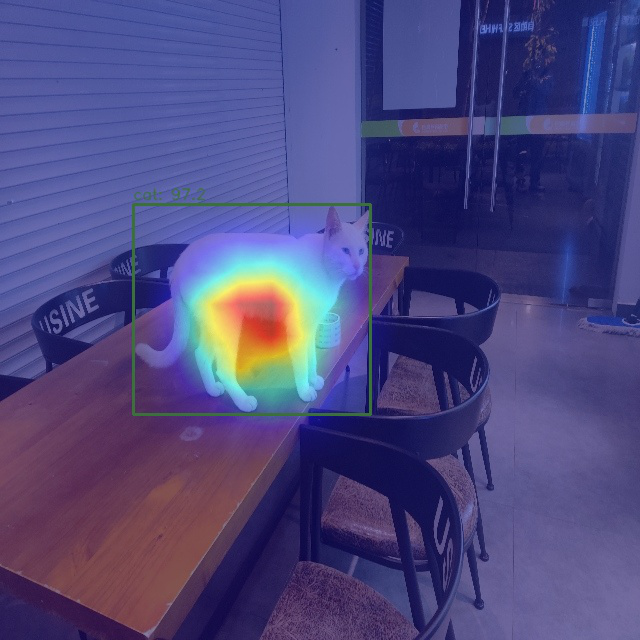

In [ ]:
!python demo/boxam_vis_demo.py \
      resized_image.jpg \
      ../mmdetection/rtmdet_tiny_1xb12-40e_cat.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_cat/best_coco/bbox_mAP_epoch_30.pth  \
      --target-layer neck.out_convs[2]
Image.open('output/resized_image.jpg')       

可以看出效果较好

**(b) 查看 neck 输出的最大输出特征图的 Grad CAM**

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_cat/best_coco/bbox_mAP_epoch_30.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[>>] 1/1, 1.8 task/s, elapsed: 1s, ETA:     0sAll done!
Results have been saved at /content/mmyolo/output


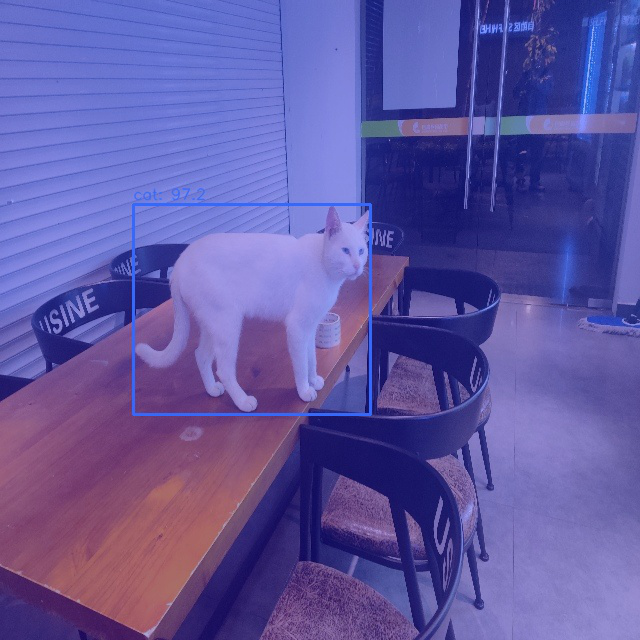

In [ ]:
!python demo/boxam_vis_demo.py \
      resized_image.jpg \
      ../mmdetection/rtmdet_tiny_1xb12-40e_cat.py \
      ../mmdetection/work_dirs/rtmdet_tiny_1xb12-40e_cat/best_coco/bbox_mAP_epoch_30.pth  \
      --target-layer neck.out_convs[0]
Image.open('output/resized_image.jpg')     

可以发现由于大物体不会在该层预测，因此梯度可视化是 0，符合预期。

# 检测新趋势
随着 ChatGPT 等的 LLM 飞速发展，传统的目标检测也逐渐发展为传统的封闭类别集合检测和自然语言相结合的开放类别检测(当然还有其他非常多结合检测的新方向)。典型的方向如：

1. **Open-Vocabulary Object Detection**，即开放词汇目标检测，给定图片和类别词汇表，检测所有物体
2. **Grounding Object Detection**，即给定图片和文本描述，预测文本中所提到的在图片中的物体位置

大家可以多关注这个新方向和新趋势。该方向的典型算法为 GLIP, 目前(2023.6)在 MMDetection 的 dev-3.x 中已经支持，其检测效果演示如下(如果你感兴趣，可以自己跑一下)：

**(1) 图片+ 语言描述：bench.car**

![image](https://user-images.githubusercontent.com/17425982/234548156-ef9bbc2e-7605-4867-abe6-048b8578893d.png)

上述输入的是固定类别名，因此等价于 Open-Vocabulary Object Detection。如果将类别名设置为 COCO 全部类别，那么其实就可以转变了常规的目标检测算法。

**(2) 图片+ 语言描述：There are a lot of cars here.**

![image](https://user-images.githubusercontent.com/17425982/234548490-d2e0a16d-1aad-4708-aea0-c829634fabbd.png)

上述输入是自然语言描述，因此等价于 Grounding Object Detection

当然随着 ChatGPT 的强大功能，一个模型可以完成非常多不可思议的事情，在视觉领域大家也开始倾向于研究大一统模型，例如通用图像分割模型，一个模型可以实现封闭集和开放集语义分割、实例分割、全景分割、图像描述等等任务，典型的如 X-Decoder

![image](https://github.com/open-mmlab/mmdetection/assets/17425982/250772dd-d58c-4f04-8c2a-a2dd4eb88d11)

目前 MMDetection 也在支持该算法。后续 MMDetection 会重点支持多模态算法，欢迎有志之士来共同参与！

# 总结

本教程提供了从数据到推理的全流程，并进行了详细的可视化分析，最后简单分析和探讨了下目标检测新的发展趋势。希望本文对你有帮助！！！